In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import os
from sklearn.cluster import KMeans

### Step 1: Kmeans     
      
For this section, load up the 'new_demographic_data.xls' spreadsheet into Python using pandas. You will see there are two columns (PC1 and PC2) corresponding to PCA results applied to SNV data for each sample.    
     
Apply Kmeans to these two variables using SKlearn with a range of k clusters from k = 1 to k =10.  
Recall that we can measure the goodness of fit of Kmeans using 'Inertia'. For each k, fit the model and record the interia.
You will also need to record the 'labels' - these labels tell you which cluster each row belongs to for each k.   
       
Finally, plot the inertia against k to give an elbow plot, identify the optimal k number.     
For the optimal k number, look at the class labels for each row, do they correspond to ancestry?      
You can use the .loc function in Pandas to select out different cluster labels.   

In [2]:
# load up the demographic dataset
pheno_df = pd.read_excel('new_demographic_data.xls')[['ID', 'phenotype', 'sex', 'ancestry', 'PC1', 'PC2']]

In [3]:
i_list = []                           # this list will keep track of cluster number
label_list = []                       # this list will store the class results for each model
inert_list = []                       # this list will store the inertia (goodness of fit metric) for each model
for i in range(1,10):                        # fit 10 kmeans models to data using no. clusters 1-10
    i_list.append(i)
    mod = KMeans(n_clusters=i)
    mod.fit(pheno_df[['PC1', 'PC2']].to_numpy())
    label_list.append(list(mod.labels_))          # for each model, keep track of the inertia and results
    inert_list.append(mod.inertia_)

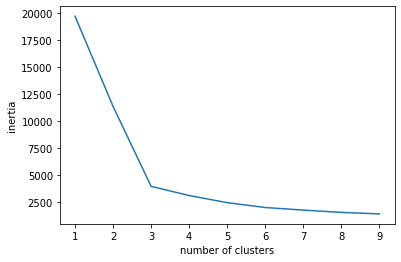

In [4]:
plt.plot(i_list, inert_list)           # plot the number of classes against inertia to make an elbow plot
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [5]:
new_df = pheno_df                        # dupliacte the df for this next section
new_df['cluster'] = label_list[2]        # make a new column corresponding to the labels from the 3 centroid k means
                                         # (we can see from the elbow plot that 3 is the best no. of clusters)
new_df.loc[new_df['cluster'] == 1]       # options are 0,1 or 2 (as there are 3 cluster labels)
                                         # The clusters correspond to different nationalities (african,euro,asian)

,ID,phenotype,sex,ancestry,PC1,PC2,cluster
1,ID_002,1,male,european,-2.853298,-9.819218,1
2,ID_003,1,male,european,2.015809,-8.220454,1
6,ID_007,1,female,european,-0.499842,-9.043001,1
9,ID_010,1,female,european,-1.719337,-6.265497,1
13,ID_014,0,male,european,-3.030237,-8.978195,1
...,...,...,...,...,...,...,...
681,ID_682,0,female,european,-2.160049,-6.535942,1
684,ID_685,0,female,european,-0.914070,-8.282346,1
693,ID_694,1,male,european,-0.517427,-8.433967,1
694,ID_695,0,male,european,0.618093,-5.997950,1


### Step 2: read in genotype data        
For this step, you will need to merge all of the genotype VCF files into a single matrix.     
Each row should correspond to a sample ID (stored in the filename). Each column should correspond to a genotype, there should also be an ID column.     
     
Hint: use os.litdir() to loop through the files containing the 'vcf' suffix and open them.     
Loop through each of the files and store the genotype data in a list (remember the header lines start with a '#' symbol - do not include these in the list). The first element of the list should be the sample ID.      
These lists should be stored in a nested list. So you should end up with an array, where each row corresponds to a sample and each column to a genetic locus/genotype (and one column for ID).    
An array like this can be loaded up into a pandas dataframe.      


In [6]:
genolist = []                # initialise a list to load in data
for filename in os.listdir():               # loop through the directory of VCF files
    if 'ID' in filename:
        loc_list = []
        file = open(filename)               # open each vcf file
        genlist = [filename.split('.')[0]]
        for line in file:
            if line[0] != '#':              # if the current line is not a header line: extract the genotype
                 
                genlist.append(line.split()[9].split(':')[0])
                loc_list.append(line.split()[0] + ':' + line.split()[1])
        genolist.append(genlist)
        file.close()

In [7]:
genoarray = np.array(genolist) # convert the nested list to an array

In [8]:
gen_df = pd.DataFrame(genoarray, columns = ['ID'] + loc_list) # convert the array to a pandas dataframe

In [9]:
gen_df.head() # view the genotype dataframe

,ID,chr1:761736,chr1:1467559,chr1:2320149,chr1:2537211,chr1:2640985,chr1:3110371,chr1:3767560,chr1:4760386,chr1:5190398,...,chr22:7702980,chr22:7754807,chr22:7917826,chr22:8339412,chr22:8777336,chr22:9522669,chr22:10184368,chr22:10278717,chr22:11078487,chr22:11944872
0,ID_001,0,0,1,0,1,0,1,0,1,...,1,0,1,1,1,0,1,1,1,1
1,ID_002,1,0,0,0,1,1,0,1,1,...,1,0,1,0,1,1,1,1,0,0
2,ID_003,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,1,0,1,1
3,ID_004,1,0,1,0,0,1,0,1,1,...,0,1,1,0,0,1,0,0,0,1
4,ID_005,0,1,1,0,1,0,1,0,1,...,1,1,1,1,1,1,0,0,0,0


In [10]:
pheno_df.head() # view the phenotype dataframe

,ID,phenotype,sex,ancestry,PC1,PC2,cluster
0,ID_001,1,female,asian,5.388444,-5.929301,2
1,ID_002,1,male,european,-2.853298,-9.819218,1
2,ID_003,1,male,european,2.015809,-8.220454,1
3,ID_004,0,male,asian,6.102479,-4.118630,2
4,ID_005,1,female,asian,4.866751,-7.164220,2


### Step 3: preparing data for analysis       
The first thing to do is merge the genotype dataframe and the phenotype dataframe. This is easily achieved using pd.merge.   
The next step will be to convert all non-numerical variables to numerical: namely 'sex' and 'ancestry'. Sex can be easily converted to binary e.g. 0 = male, 1= female. For ancestry, as there are 3 possible values (African, Asian, European), we will use dummy coding I.E. we will make 2 binary variables, one variable corresponding to African = 1, european = 0 and another variable corresponding to Asian = 1, not Asian = 0. 


In [11]:
# merge the phenotype and genotype dataframes on 'ID'
merged_df = pd.merge(gen_df, pheno_df, on = ('ID', 'ID'))

In [12]:
merged_df.head()

,ID,chr1:761736,chr1:1467559,chr1:2320149,chr1:2537211,chr1:2640985,chr1:3110371,chr1:3767560,chr1:4760386,chr1:5190398,...,chr22:10184368,chr22:10278717,chr22:11078487,chr22:11944872,phenotype,sex,ancestry,PC1,PC2,cluster
0,ID_001,0,0,1,0,1,0,1,0,1,...,1,1,1,1,1,female,asian,5.388444,-5.929301,2
1,ID_002,1,0,0,0,1,1,0,1,1,...,1,1,0,0,1,male,european,-2.853298,-9.819218,1
2,ID_003,0,0,0,0,0,0,1,0,0,...,1,0,1,1,1,male,european,2.015809,-8.220454,1
3,ID_004,1,0,1,0,0,1,0,1,1,...,0,0,0,1,0,male,asian,6.102479,-4.118630,2
4,ID_005,0,1,1,0,1,0,1,0,1,...,0,0,0,0,1,female,asian,4.866751,-7.164220,2


In [13]:
merged_df['sex'] = merged_df['sex'].map({'male':0, 'female':1}) # convert string to binary for sex variables

# apply dummy coding to the 3 ancestry variables. 
asian_list = []                   # initialise 2 lists to be our new variables. 
afro_euro_list = []
for idx, row in merged_df.iterrows(): # loop through the dataframe. If a row is African, add 0 to asian list and 0 to 
    if row['ancestry'] == 'african':  # the afro_euro list. If a row is Asian, add 1 to asian list and 0 to afro_euro.
        afro_euro_list.append(0)      # If the row is european, add 0 to asian list and 1 to afro_euro list. 
        asian_list.append(0)          # Thus, the 3 possible ancestries are stored in two variables with no loss of 
    if row['ancestry'] == 'asian':    # information. 
        afro_euro_list.append(0)
        asian_list.append(1)
    if row['ancestry'] == 'european':
        afro_euro_list.append(1)
        asian_list.append(0)
merged_df['asian'] = asian_list
merged_df['afro_euro'] = afro_euro_list


In [14]:
merged_df.head()

,ID,chr1:761736,chr1:1467559,chr1:2320149,chr1:2537211,chr1:2640985,chr1:3110371,chr1:3767560,chr1:4760386,chr1:5190398,...,chr22:11078487,chr22:11944872,phenotype,sex,ancestry,PC1,PC2,cluster,asian,afro_euro
0,ID_001,0,0,1,0,1,0,1,0,1,...,1,1,1,1,asian,5.388444,-5.929301,2,1,0
1,ID_002,1,0,0,0,1,1,0,1,1,...,0,0,1,0,european,-2.853298,-9.819218,1,0,1
2,ID_003,0,0,0,0,0,0,1,0,0,...,1,1,1,0,european,2.015809,-8.220454,1,0,1
3,ID_004,1,0,1,0,0,1,0,1,1,...,0,1,0,0,asian,6.102479,-4.118630,2,1,0
4,ID_005,0,1,1,0,1,0,1,0,1,...,0,0,1,1,asian,4.866751,-7.164220,2,1,0


In [15]:
merged_df = merged_df.drop(['ancestry', 'ID'], axis = 1) # remove the redundant ancestry variable, we also don't want
                                                         # to use ID in our model. 

### step 4: fit regularised logistic regression with CV     
For this step, simply start by fitting a logistic regression model from sklearn. The independent variables are all columns in merged_df except for phenotype. The dependent variable is phenotype.     
Try some different input arguments (e.g. penalty, solver) and see how this effects the model. Are there any combinations of inputs that don't work?      
Using the elasticnet penalty and saga solver, run cross validation grid search to find an l1_ratio that gives the highest AUC score.      

In [16]:
from sklearn.linear_model import LogisticRegression # fit the regularised logistic regression model to our merged data.
logmod = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.9, solver = 'saga', max_iter = 1000).fit(merged_df.drop('phenotype', axis = 1), merged_df['phenotype'])

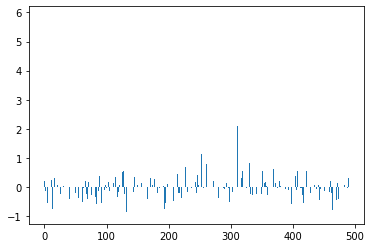

In [17]:
plt.bar(range(len(logmod.coef_[0])), logmod.coef_[0])
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV # import gridsearchCV

parameter_grid = {'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]} # initialise grid for parameter we want to tune

# define the gridsearch CV we want to run and fit to the data
GS = GridSearchCV(LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 1000), parameter_grid, 'roc_auc')
GS.fit(merged_df.drop('phenotype', axis = 1), merged_df['phenotype'])

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [19]:
GS.best_score_ # print out the best AUC score obtained from the gridsearch 

0.8711302211302211

In [20]:
GS.best_params_ # find the l1 parameter value that gave the best score

{'l1_ratio': 0.9}